In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input


In [23]:
df = pd.read_excel('default of credit card clients.xls')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# To rename the column
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)

#To remove the ID column as it is not informative
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
# DATA PREPROCESSING

# Count missing or null values
print(f"Number of missing values in SEX: {len(df[pd.isnull(df.SEX)])}")
print(f"Number of missing values in MARRIAGE: {len(df[pd.isnull(df.MARRIAGE)])}")
print(f"Number of missing values in EDUCATION: {len(df[pd.isnull(df.EDUCATION)])}")
print(f"Number of missing values in AGE: {len(df[pd.isnull(df.AGE)])}")


Number of missing values in SEX: 0
Number of missing values in MARRIAGE: 0
Number of missing values in EDUCATION: 0
Number of missing values in AGE: 0


In [27]:
# Check dimensions for invalid values
print(f"SEX values include: {df['SEX'].unique()}")
print(f"MARRIAGE values include: {df['MARRIAGE'].unique()}")
print(f"EDUCATION values include: {df['EDUCATION'].unique()}")

SEX values include: [2 1]
MARRIAGE values include: [1 2 3 0]
EDUCATION values include: [2 1 3 5 4 6 0]


In [28]:
#Filter the DataFrame
df_new = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
df_new.shape

(29932, 24)

In [29]:
print(df_new.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object


In [62]:
# Separate features and target variable
X = df_new.drop(columns=['DEFAULT'])
y = df_new['DEFAULT']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Define the model
model = Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7975 - loss: 0.5010 - val_accuracy: 0.8190 - val_loss: 0.4442
Epoch 2/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8209 - loss: 0.4405 - val_accuracy: 0.8160 - val_loss: 0.4419
Epoch 3/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4410 - val_accuracy: 0.8198 - val_loss: 0.4434
Epoch 4/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8173 - loss: 0.4388 - val_accuracy: 0.8188 - val_loss: 0.4360
Epoch 5/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4260 - val_accuracy: 0.8190 - val_loss: 0.4388
Epoch 6/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4223 - val_accuracy: 0.8194 - val_loss: 0.4368
Epoch 7/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8243 - loss: 0.4322 - val_accuracy: 0.8177 - val_loss: 0.4346
Epoch 8/50
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.4234 - val_accuracy: 0.

In [37]:
# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {roc_auc:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[4421  239]
 [ 894  433]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4660
           1       0.64      0.33      0.43      1327

    accuracy                           0.81      5987
   macro avg       0.74      0.64      0.66      5987
weighted avg       0.79      0.81      0.79      5987

Accuracy: 0.8108
AUC-ROC: 0.6375


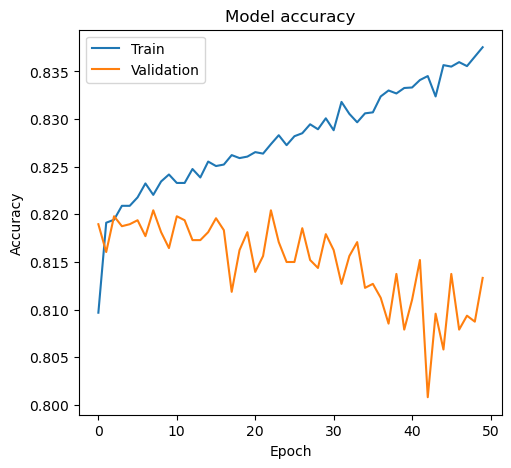

In [56]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


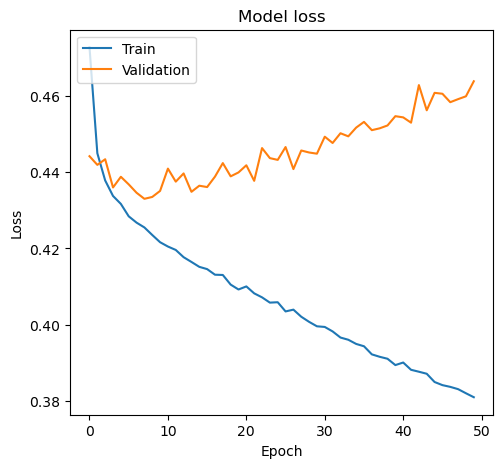

In [55]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


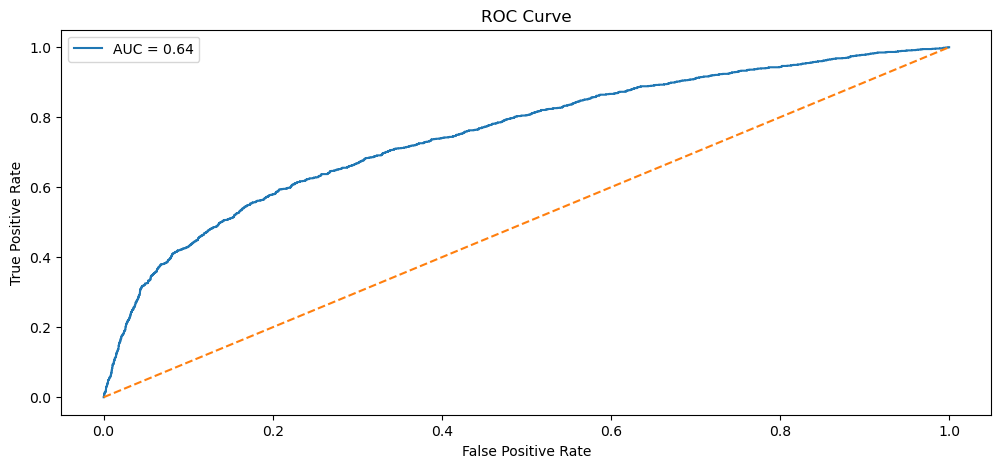

In [57]:
# Plot ROC Curve
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [59]:
# Predict for the first 5 random test variables
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
sample_X_test = X_test[random_indices]
sample_y_test = y_test.iloc[random_indices]

# Predict and print results
predictions = (model.predict(sample_X_test) > 0.5).astype("int32")

print("Random Test Samples Prediction vs Actual:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1} - Predicted: {pred[0]}, Actual: {sample_y_test.iloc[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Random Test Samples Prediction vs Actual:
Sample 1 - Predicted: 0, Actual: 0
Sample 2 - Predicted: 0, Actual: 0
Sample 3 - Predicted: 0, Actual: 0
Sample 4 - Predicted: 0, Actual: 1
Sample 5 - Predicted: 0, Actual: 0


In [61]:
# Save the model in the native Keras format
model.save('credit_default_model.keras')
